In [16]:
#!pip install prettytable

In [1]:
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el archivo CSV
file_path = r'..\data\processed\datos_seguridad.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame
df.head()

,FECHA_CORTE,FECHA_REGISTRO,ID_DOC_DENUNCIA,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,TIPO_DE_DENUNCIA,SITUACION_DENUNCIA,TIPO,...,FECHA_NACIMIENTO,EDAD_PERSONA,SEXO,ESTADO_CIVIL,GRADO_INSTRUCCION,OCUPACION,PAIS_NATAL,MES,LONGITUD,LATITUD
0,2024-04-25,2024-02-26,4e35831afdd9aa1958807a7b32ea5b53a26aa74d1556d5...,70101,CALLAO,CALLAO,CALLAO,DENUNCIA,PENDIENTE,VIOLENCIA A MUJERES Y GGVV,...,1990-07-13,33,MASCULINO,SOLTERO,NO INDICA,NO INDICA,PERU,202402,-77.115782,-12.005028
1,2024-04-25,2024-02-21,7ccf55ed76f62bc29e46f082caa7e57c289dc59bded9d8...,70101,CALLAO,CALLAO,CALLAO,DENUNCIA,RESUELTA,VIOLENCIA A MUJERES Y GGVV,...,1985-01-29,39,MASCULINO,SOLTERO,NO INDICA,NO INDICA,PERU,202402,-77.154571,-11.844027
2,2024-04-25,2024-02-10,fed71611056418d9ebbda0717e8252554c85b3b08f34fa...,70101,CALLAO,CALLAO,CALLAO,DENUNCIA,RESUELTA,VIOLENCIA A MUJERES Y GGVV,...,1993-10-21,30,MASCULINO,SOLTERO,NO INDICA,NO INDICA,PERU,202402,-77.126113,-12.051164
3,2024-04-25,2024-02-20,7d920f96de74cf295cbbb4da54057db724c98421ffa0a1...,70101,CALLAO,CALLAO,CALLAO,DENUNCIA,RESUELTA,VIOLENCIA A MUJERES Y GGVV,...,1985-06-06,38,MASCULINO,SOLTERO,NO INDICA,VIGILANTE,PERU,202402,-77.129483,-11.951019
4,2024-04-25,2024-02-23,060b191856ee7bf4feb80322d9c04ff36bbc99eaa75075...,70101,CALLAO,CALLAO,CALLAO,INTERVENCION,RESUELTA,PATRIMONIO,...,1995-09-26,28,MASCULINO,SOLTERO,NO INDICA,NO INDICA,PERU,202402,-77.125383,-12.051164


In [5]:
# Estilizar la tabla para mostrarlo en la web

columnas_seleccionadas = ['FECHA_REGISTRO','DEPARTAMENTO','PROVINCIA','DISTRITO','TIPO_DE_DENUNCIA','SITUACION_DENUNCIA','TIPO','SUBTIPO','MODALIDAD','FECHA_HECHO','HORA_HECHO','UBICACION',
                          'DESCRIPCION','FECHA_NACIMIENTO','EDAD_PERSONA','SEXO','ESTADO_CIVIL','GRADO_INSTRUCCION','OCUPACION','PAIS_NATAL','LONGITUD','LATITUD']

df_muestra = df[columnas_seleccionadas].head(10) # mostrar las primeras 10 filas

# código html de la tabla
html = '''
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Tabla Moderna y Responsive</title>
    <link rel="stylesheet" href="styles.css">
</head>
<body>
    <div class="table-container">
        <table class="responsive-table">
            <thead>
                <tr>
'''

for col in columnas_seleccionadas:
    html += f'                    <th>{col}</th>\n'

html += '''
                </tr>
            </thead>
            <tbody>
'''

for index, row in df_muestra.iterrows():
    html += '                <tr>\n'
    for col in columnas_seleccionadas:
        html += f'                    <td>{row[col]}</td>\n'
    html += '                </tr>\n'

html += '''
            </tbody>
        </table>
    </div>
</body>
</html>
'''

# guardar
with open(r'..\docs\table_sample.html', 'w', encoding='utf-8') as file:
    file.write(html)

# ¿Cuál es la distribución de los tipos de delitos registrados?

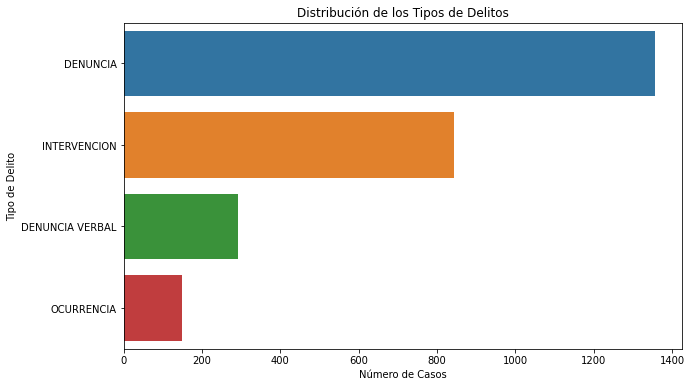

In [6]:
# Gráfico de barras de la distribución de los tipos de delitos
plt.figure(figsize=(10, 6))
sns.countplot(y='TIPO_DE_DENUNCIA', data=df, order=df['TIPO_DE_DENUNCIA'].value_counts().index)
plt.title('Distribución de los Tipos de Delitos')
plt.xlabel('Número de Casos')
plt.ylabel('Tipo de Delito')
plt.show()

# ¿Cómo varía el número de delitos a lo largo del tiempo?

# Gráfico de línea del número de delitos a lo largo del tiempo
plt.figure(figsize=(12, 6))
df.groupby(df['Fecha'].dt.to_period('M')).size().plot(kind='line')
plt.title('Número de Delitos a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Delitos')
plt.show()


# ¿Qué distritos tienen la mayor cantidad de delitos reportados?

# ¿Hay alguna correlación entre los diferentes tipos de delitos?